In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading the Training and Testing Data

## Training Data

In [2]:
df_train = pd.read_csv("../data/Email_train.csv")
pd.set_option('display.max_columns', None)
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
# Information about all the columns in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [4]:
# Mean and variance of the numerical columns
pd.set_option('display.max_columns', None)
df_train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [5]:
# Column names in dataset
df_train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [6]:
# Sum of null values
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [7]:
df_train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [8]:
df_train.size

41536

In [9]:
df_train.shape

(1888, 22)

# Graph

In [10]:
pd.set_option('display.max_columns', None)
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


<Figure size 720x432 with 0 Axes>

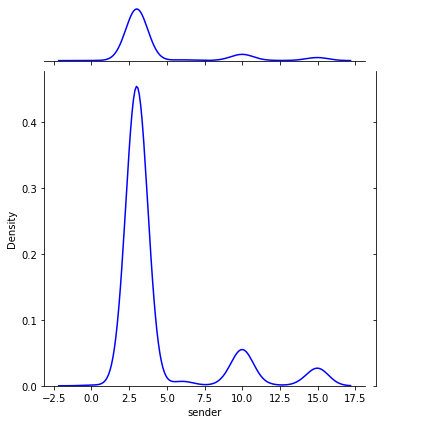

In [11]:
# KDE graph to determine maximum emails sent by sender
plt.figure(figsize=(10,6));
sns.jointplot(data = df_train, x = 'sender', color='blue', kind= 'kde');

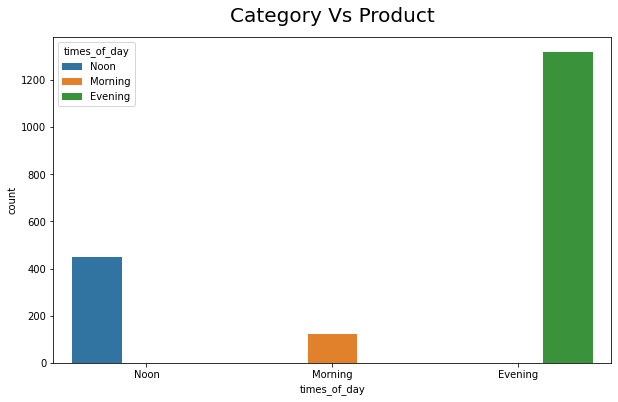

In [12]:
# From this plot we can see maximum number of emails has been sent in evening.
plt.figure(figsize=(10,6))
plt.title("Category Vs Product", fontdict = {'fontsize': 20}, pad=15)
sns.countplot(x='times_of_day', hue = 'times_of_day', data = df_train);

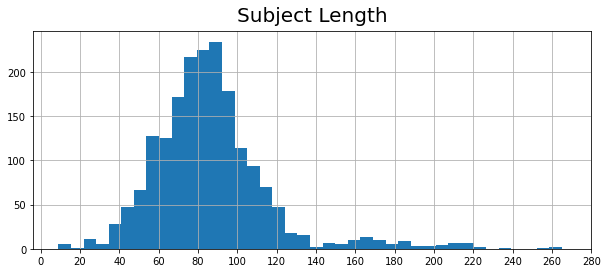

In [13]:
# We can see that the maximum email has been sent with subject_len between 80 to 100

plt.title("Subject Length", fontdict = {'fontsize': 20}, pad=10)
df_train['subject_len'].hist(bins=40, figsize=(10,4))
plt.xticks(range(0, 300, 20));

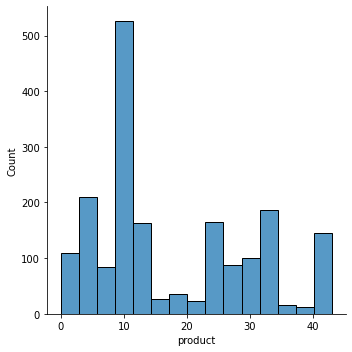

In [14]:
# Maximum emails had 10 products

sns.displot(df_train['product']);

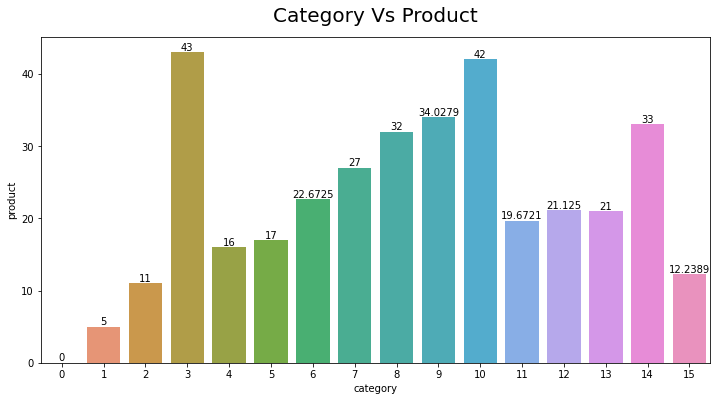

In [15]:
plt.figure(figsize=(12, 6));
plt.title("Category Vs Product", fontdict = {'fontsize': 20}, pad=15)

ax = sns.barplot(data=df_train, x="category", y= "product", ci=0);
for i in ax.containers:
    ax.bar_label(i,)

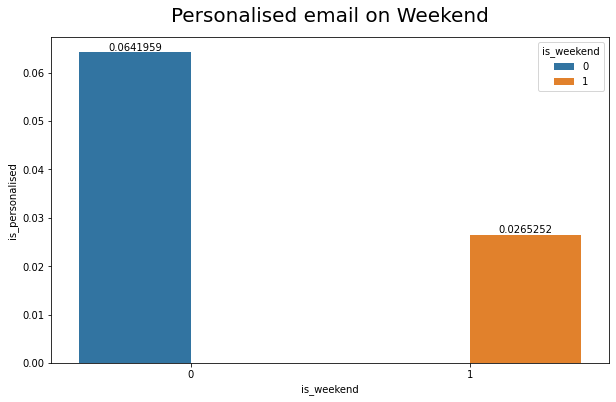

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Personalised email on Weekend", fontdict = {'fontsize': 20}, pad=15)
ax = sns.barplot(data=df_train, x="is_weekend", y= "is_personalised", ci=0, hue="is_weekend");
for i in ax.containers:
    ax.bar_label(i,)

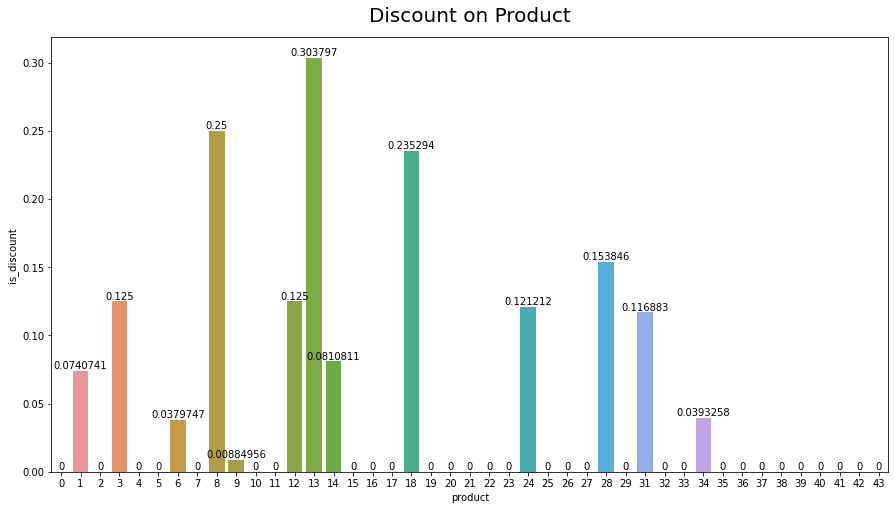

In [17]:
# Product 13 has more discount than any other product
plt.figure(figsize=(15,8))
plt.title("Discount on Product", fontdict = {'fontsize': 20}, pad=15)
ax = sns.barplot(data=df_train, x="product", y= "is_discount", ci=0);
for i in ax.containers:
    ax.bar_label(i,)

## Changing categorical value to numerical value

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
df_train['times_of_day'] = le.fit_transform(df_train['times_of_day'])

## Testing Data

In [20]:
df_test = pd.read_csv("../data/Email_test.csv")
pd.set_option('display.max_columns', None)
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [21]:
# Information about all the columns in the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

In [22]:
# Mean and variance of the numerical columns
pd.set_option('display.max_columns', None)
df_test.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.000000,762.000000,762.000000,762.000000,762.000000
mean,2269.500000,4.249344,86.509186,14184.263780,33.185039,2.850394,0.209974,9.590551,17.872703,4.212598,30.154856,0.942257,0.043307,0.864829,0.0,0.286089,0.031496,20.994751,0.114173,11.648294
std,220.114743,3.131927,30.586394,7179.056026,26.889537,1.791697,0.407557,5.314579,11.786908,3.911229,10.952515,0.877114,0.203681,1.028553,0.0,0.973791,0.174769,315.295844,0.318230,3.034567
min,1889.000000,1.000000,11.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.250000,3.000000,68.000000,9697.250000,20.000000,1.000000,0.000000,6.000000,9.000000,2.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2269.500000,3.000000,83.000000,12740.500000,27.500000,3.000000,0.000000,10.000000,13.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
75%,2459.750000,3.000000,98.000000,16746.000000,39.000000,4.000000,0.000000,15.000000,26.000000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
max,2650.000000,15.000000,265.000000,44491.000000,498.000000,6.000000,1.000000,15.000000,44.000000,42.000000,96.000000,6.000000,1.000000,5.000000,0.0,17.000000,1.000000,5000.000000,1.000000,16.000000


In [23]:
# Column names in dataset
df_test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

In [24]:
# Sum of null values
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [25]:
df_test.size

16002

In [26]:
df_test.shape

(762, 21)

# Graph

<Figure size 720x432 with 0 Axes>

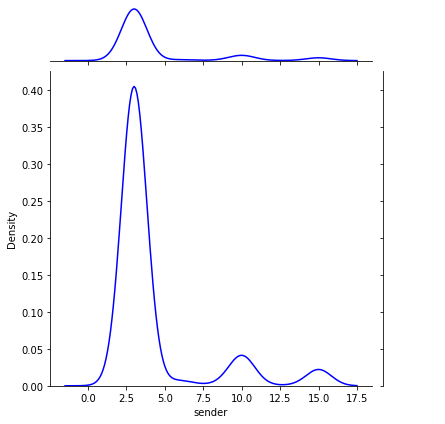

In [27]:
# KDE graph to determine maximum emails sent by sender
plt.figure(figsize=(10,6));
sns.jointplot(data = df_test, x = 'sender', color='blue', kind= 'kde');

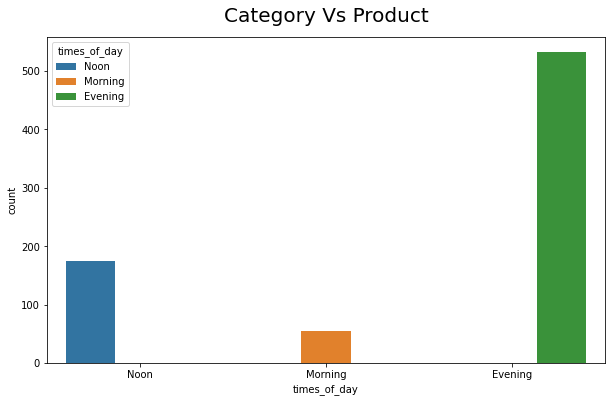

In [28]:
# From this plot we can see maximum number of emails has been sent in evening.
plt.figure(figsize=(10,6))
plt.title("Category Vs Product", fontdict = {'fontsize': 20}, pad=15)
sns.countplot(x='times_of_day', hue = 'times_of_day', data = df_test);

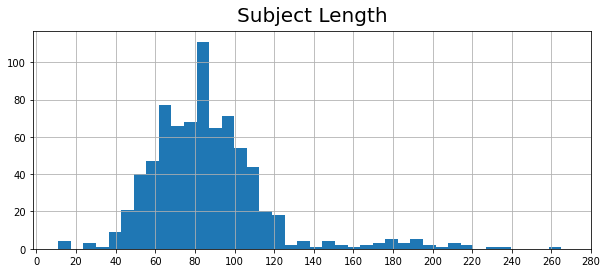

In [29]:
# We can see that the maximum email has been sent with subject_len between 80 to 100

plt.title("Subject Length", fontdict = {'fontsize': 20}, pad=10)
df_test['subject_len'].hist(bins=40, figsize=(10,4))
plt.xticks(range(0, 300, 20));

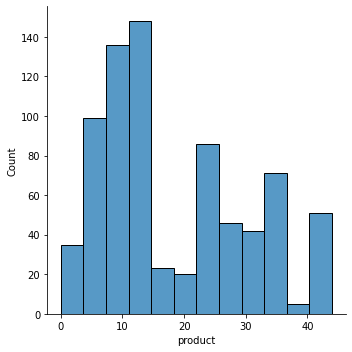

In [30]:
# Maximum emails had 10 products

sns.displot(df_test['product']);

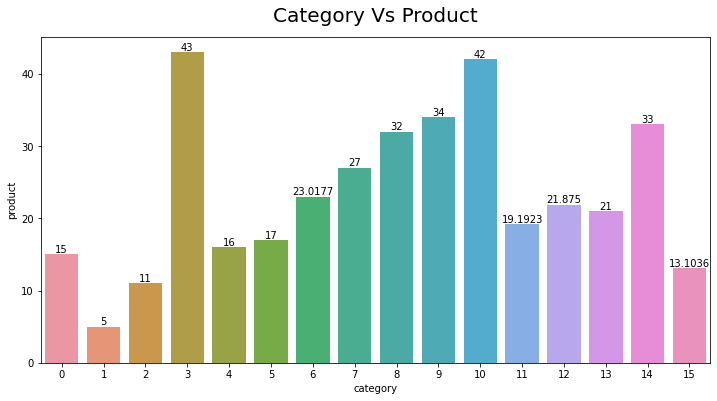

In [31]:
plt.figure(figsize=(12, 6));
plt.title("Category Vs Product", fontdict = {'fontsize': 20}, pad=15)

ax = sns.barplot(data=df_test, x="category", y= "product", ci=0);
for i in ax.containers:
    ax.bar_label(i,)

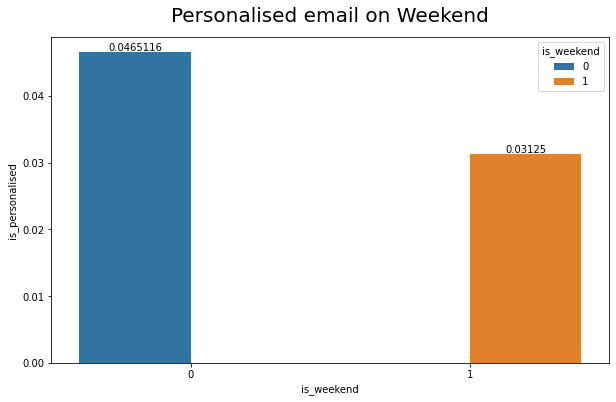

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Personalised email on Weekend", fontdict = {'fontsize': 20}, pad=15)
ax = sns.barplot(data=df_test, x="is_weekend", y= "is_personalised", ci=0, hue="is_weekend");
for i in ax.containers:
    ax.bar_label(i,)

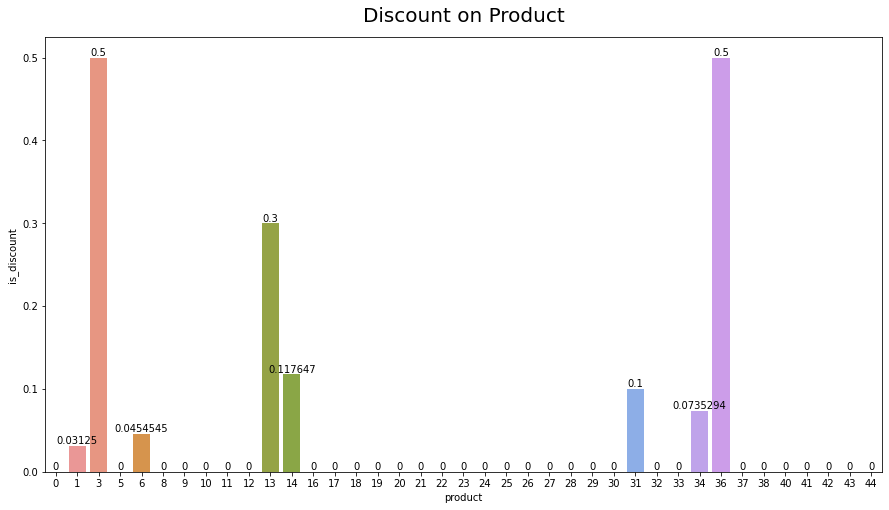

In [33]:
# Product 13 has more discount than any other product
plt.figure(figsize=(15,8))
plt.title("Discount on Product", fontdict = {'fontsize': 20}, pad=15)
ax = sns.barplot(data=df_test, x="product", y= "is_discount", ci=0);
for i in ax.containers:
    ax.bar_label(i,)

In [34]:
le = LabelEncoder()
df_test['times_of_day'] = le.fit_transform(df_test['times_of_day'])

In [39]:
df_train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,2,2,11,0,22,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,0,2,11,5,27,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,0,15,9,4,28,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,0,2,11,5,27,0,0,0,0,0,0,0,0,16,0.012014


In [56]:
sort_data = np.sort(df_train['body_len'])

# IQR

Q1 = np.percentile(df_train['body_len'], 25, method = 'midpoint')
Q2 = np.percentile(df_train['body_len'], 50, method = 'midpoint')
Q3 = np.percentile(df_train['body_len'], 75, method = 'midpoint')
Q1, Q2, Q3

(9552.0, 12689.0, 17352.0)

In [57]:
IQR = Q3 - Q1
IQR

7800.0

In [58]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2148.0
up_limit is 29052.0


In [59]:
outlier =[]
for x in df_train['body_len']:
    if ((x> up_lim) or (x<low_lim)):
        outlier.append(x)
print(' outlier in the dataset is', outlier)


 outlier in the dataset is [31389, 31383, 29451, 33099, 30541, 40968, 29519, 31535, 30674, 33120, 30693, 30693, 32475, 32520, 29263, 30373, 32161, 32341, 32341, 29342, 33297, 33762, 40980, 40980, 32031, 35983, 32750, 29586, 38046, 29336, 30425, 29244, 33664, 31145, 29535, 29535, 29465, 37561, 37744, 30428, 34258, 35892, 33825, 39271, 41892, 38960, 32932, 31428, 30691, 30321, 33201, 32866, 29391, 32203, 33334, 39009, 37579, 37009, 36266, 40079, 29928, 29928, 42075, 35775, 31223, 29187, 38846, 38846, 39774, 29947, 30909, 29947, 44491, 43189, 39989, 30131, 37765, 39216, 39601, 39583, 38456, 41261, 34254, 34521, 29685, 39237, 39770, 40292, 39785, 31021, 38481, 29271, 29923, 33726]


# Modelling using Machine Learning

## Training and Testing Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_train.drop("click_rate", axis=1)
y = df_train["click_rate"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42, test_size=0.4)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score()

NameError: name 'is_weekend' is not defined